## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from tqdm.notebook import tqdm_notebook
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Testando Redes Neurais sem os Atributos Categórios

In [2]:
data = pd.read_csv('data/covtype.csv')

In [3]:
data = data.drop(columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
                  'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20',
                  'Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30',
                  'Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'])

In [4]:
X = data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]# Passando os atributos usadas para o treino
y = data[['Cover_Type']]# classe para treino


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True)
y_train = y_train.values.ravel()

In [6]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)


#X_train_stand = X_train.copy()
#X_test_stand = X_test.copy()

#num_cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']
#for i in num_cols:
    
    # fit on training data column
#    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
#    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
#    X_test_stand[i] = scale.transform(X_test_stand[[i]])'''

In [7]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (10,), max_iter=300,activation = 'relu', solver = 'adam',verbose=True)

In [8]:
mlp.fit(X_train_std, y_train)

Iteration 1, loss = 0.92721315
Iteration 2, loss = 0.70764171
Iteration 3, loss = 0.68919085
Iteration 4, loss = 0.68077450
Iteration 5, loss = 0.67458984
Iteration 6, loss = 0.67027411
Iteration 7, loss = 0.66825057
Iteration 8, loss = 0.66662773
Iteration 9, loss = 0.66530258
Iteration 10, loss = 0.66407255
Iteration 11, loss = 0.66327462
Iteration 12, loss = 0.66260615
Iteration 13, loss = 0.66194231
Iteration 14, loss = 0.66119925
Iteration 15, loss = 0.66060113
Iteration 16, loss = 0.65982947
Iteration 17, loss = 0.65926984
Iteration 18, loss = 0.65872127
Iteration 19, loss = 0.65829217
Iteration 20, loss = 0.65790946
Iteration 21, loss = 0.65767219
Iteration 22, loss = 0.65740262
Iteration 23, loss = 0.65730757
Iteration 24, loss = 0.65696275
Iteration 25, loss = 0.65684174
Iteration 26, loss = 0.65656139
Iteration 27, loss = 0.65651585
Iteration 28, loss = 0.65640337
Iteration 29, loss = 0.65621782
Iteration 30, loss = 0.65595662
Iteration 31, loss = 0.65585366
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=1,
              verbose=True)

In [9]:
prediction=mlp.predict(X_test_std)

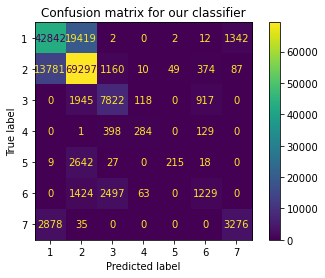

In [10]:
cm = confusion_matrix(y_test, prediction, labels=mlp.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.title("Confusion matrix for our classifier")
plt.show()

In [11]:
print('Accuracy: ',accuracy_score(prediction,y_test))
print('F1-Score: ',f1_score(prediction,y_test,average='weighted'))
print('Precision: ',precision_score(prediction,y_test,average='weighted'))
print('Recall: ',recall_score(prediction,y_test,average='weighted'))

Accuracy:  0.7169370754543786
F1-Score:  0.7267955943465603
Precision:  0.7428468422252784
Recall:  0.7169370754543786


### Treinamento com Otimizador  ADAM (100x)

In [12]:
acc = []
f1 = []
for i in tqdm_notebook(range (0,20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True)
    y_train = y_train.values.ravel()
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (10,), max_iter=300,activation = 'relu', solver = 'adam',verbose=False)
    mlp.fit(X_train_std, y_train)
    prediction=mlp.predict(X_train_std)
    acc.append(accuracy_score(prediction,y_train))
    f1.append(f1_score(prediction,y_train,average='weighted'))

  0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
acc = pd.Series(acc)
f1 = pd.Series(f1)

In [14]:
acc.mean()

0.7151440345407516

In [15]:
acc.std()

0.0022547989541786273

In [16]:
f1.mean()

0.7241751175186033

In [17]:
f1.std()

0.0026988624075777634

### Treinamento com Otimizador  SGD (100x)

In [18]:
acc2 = []
f12 = []
for i in tqdm_notebook(range(20)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = True)
    y_train = y_train.values.ravel()
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (10,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
    mlp.fit(X_train_std, y_train)
    prediction=mlp.predict(X_train_std)
    acc2.append(accuracy_score(prediction,y_train))
    f12.append(f1_score(prediction,y_train,average='weighted'))

  0%|          | 0/20 [00:00<?, ?it/s]

In [19]:
acc2 = pd.Series(acc2)
f12 = pd.Series(f12)

In [20]:
acc2.mean()

0.7166271624851246

In [21]:
acc2.std()

0.001199308033906115

In [22]:
f12.mean()

0.7278697146938741

In [23]:
f12.std()

0.001755150894815554

### Resultados
#### Com ADAM: (tempo =  x)
 Média - Acurácia = 0.73 <br>
 Desvio Padrão - Acurácia = 0.0030 <br>
 Média - F1-Score = 0.54<br>
 Desvio Padrão - F1-Score = 0.017<br>
 #### Com SGD: (tempo <x)
 Média - Acurácia = 0.73 <br>
 Desvio Padrão - Acurácia = 0.0030 <br>
 Média - F1-Score = 0.54<br>
 Desvio Padrão - F1-Score = 0.017<br>

Houve influência da escolha do otimizador no desempenho da rede?<br>
**Houve sim, mas no quesito execução. Pois em questão de valores, os resultados foram bastante semelhantes**

# Estimando o número de neurônios

hidden_layer_sizes -  encontrado no classificador MLP indica o número
de neurônios na camada oculta e para estimar essa quantidade de neurônios foi utilizada a
Regra da Pirâmide Geométrica (Geometric Pyramid Rule) proposta por Masters (1993). Onde,
para uma camada oculta com $n$ entradas e $m$ saídas, a camada oculta terá $\sqrt{n \cdot m}$ neuronios.

$$10 = \alpha \cdot \sqrt{14 \cdot 7},$$ $$\alpha = 1.01015...$$

### For $\alpha = 0.5, N_h = 5 $ ($N_h$ = 4.94...)

In [24]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (5,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)

In [25]:
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)

In [26]:
f1_score(prediction,y_train,average='weighted')

0.7134900983765927

In [27]:
accuracy_score(prediction,y_train)

0.6989092911867975

### For $\alpha = 2, N_h = 20 $ ($N_h$ = 19.79898...)

In [28]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (20,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)

In [29]:
f1_score(prediction,y_train,average='weighted')

0.742879860675122

In [30]:
accuracy_score(prediction,y_train)

0.7347777766849927

### For $\alpha = 3, N_h = 30 $ ($N_h$ = 29.69848...)

In [31]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (30,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)

C:\Users\delrick.oliveira\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
f1_score(prediction,y_train,average='weighted')

0.7506997440846528

In [33]:
accuracy_score(prediction,y_train)

0.7445907137307356

### Resultados 
#### a = 0.5
Acurácia = 0.71<br>
F1-Score = 0.45<br>
#### a = 2
Acurácia = 0.75<br>
F1-Score = 0.60<br>
#### a = 3
Acurácia = 0.77<br>
F1-Score = 0.62<br>


In [34]:
a=0.1
v_a = []
v_p = []
v_f = []
for i in tqdm_notebook(range (0,20)):
    nh = a*((14*7)**1/2)
    mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (mt.ceil(nh),), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
    mlp.fit(X_train_std, y_train)
    prediction=mlp.predict(X_train_std)
    v_a.append(a)
    v_p.append(accuracy_score(prediction,y_train))
    v_f.append(f1_score(prediction,y_train,average='weighted'))
    a+=0.1

  0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\delrick.oliveira\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\delrick.oliveira\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\delrick.oliveira\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\delrick.oliveira\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\delrick.oliveira\An

In [35]:
for i in range(0,3):
    top = max(v_f)
    pos = v_f.index(top)
    print('\nTOP ',i+1,': a = ',v_a[pos],',Accuracy = ',v_p[pos],',F1-Score = ',v_f[pos])
    v_f[pos] = 0
    


TOP  1 : a =  1.9000000000000006 ,Accuracy =  0.7857160419760615 ,F1-Score =  0.7902639448367461

TOP  2 : a =  2.0000000000000004 ,Accuracy =  0.7840662096639358 ,F1-Score =  0.7894600390059748

TOP  3 : a =  1.8000000000000005 ,Accuracy =  0.7843268389114549 ,F1-Score =  0.7885562033274275


### TOP1

In [36]:
from sklearn.metrics import classification_report
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (12,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

           1       0.70      0.72      0.71    148194
           2       0.74      0.79      0.77    198385
           3       0.66      0.73      0.69     25041
           4       0.45      0.17      0.25      1952
           5       0.50      0.01      0.03      6658
           6       0.49      0.23      0.31     12154
           7       0.73      0.45      0.55     14324

    accuracy                           0.72    406708
   macro avg       0.61      0.44      0.47    406708
weighted avg       0.71      0.72      0.71    406708



### TOP2

In [37]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (8,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

           1       0.71      0.68      0.69    148194
           2       0.73      0.81      0.77    198385
           3       0.65      0.74      0.69     25041
           4       0.64      0.26      0.37      1952
           5       0.70      0.01      0.02      6658
           6       0.50      0.19      0.27     12154
           7       0.64      0.48      0.55     14324

    accuracy                           0.71    406708
   macro avg       0.65      0.45      0.48    406708
weighted avg       0.71      0.71      0.70    406708



### TOP3

In [38]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (9,), max_iter=300,activation = 'relu', solver = 'sgd',verbose=False)
mlp.fit(X_train_std, y_train)
prediction=mlp.predict(X_train_std)
print(classification_report(y_train, prediction))

              precision    recall  f1-score   support

           1       0.70      0.69      0.70    148194
           2       0.73      0.80      0.77    198385
           3       0.66      0.69      0.68     25041
           4       0.63      0.30      0.41      1952
           5       0.80      0.06      0.11      6658
           6       0.46      0.26      0.33     12154
           7       0.71      0.43      0.54     14324

    accuracy                           0.71    406708
   macro avg       0.67      0.46      0.50    406708
weighted avg       0.71      0.71      0.70    406708

